<a href="https://colab.research.google.com/github/Juhikothari/P1-Implementation-of-ml-model-for-image-classification/blob/main/p1_implementation_of_ml_model_for_imageclassification_ANN%26CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:image.png)

# Classification of Images from the CIFAR-10 Dataset using  ANN (MLP) & CNN.
The CIFAR-10 dataset consists of color 60,000 images each with 32 x 32 pixel in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

Class labels are:

airplane : 0, automobile : 1, bird : 2, cat : 3, deer : 4, dog : 5, frog : 6, horse : 7, ship : 8, truck : 9.

### Import Tensorflow

In [1]:
#!pip install matplotlib

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
import matplotlib
matplotlib.__version__

'3.8.0'

In [4]:
tf.__version__

'2.17.1'

# Check for GPU

In [5]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
#physical_devices
print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


# Load Dataset

In [6]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


## Show some sample images of data set with corresponding labels.


Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


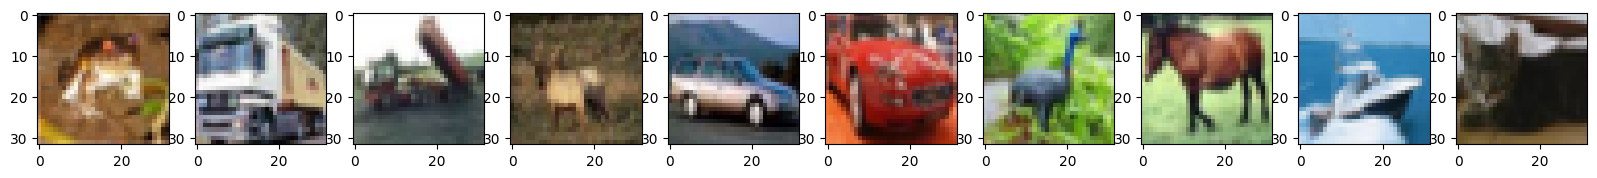

In [7]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]]))
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## Preparing the dataset
Normalize the input data

In [9]:
X_train = x_train / 255.0
X_test = x_test / 255.0
# Every Neuron is expected to have value from 0 to 1 to converge quickly(Gradient Descent)

# MLP Network

* I/p Layer - Flatten
* Hidden layer - 2048, AF = 'RELU'
* O/p Layer - 10 , AF-Softmax

In [10]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [11]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(2048,activation='relu'))
ann.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       6,293,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,313,994 (24.09 MB)

 Trainable params: 6,313,994 (24.09 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = ann.fit(X_train ,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2861 - loss: 2.2175 - val_accuracy: 0.3889 - val_loss: 1.7303
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3924 - loss: 1.7047 - val_accuracy: 0.4273 - val_loss: 1.6151
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4244 - loss: 1.6195 - val_accuracy: 0.4386 - val_loss: 1.5650
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4447 - loss: 1.5567 - val_accuracy: 0.4612 - val_loss: 1.5224
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4562 - loss: 1.5247 - val_accuracy: 0.4426 - val_loss: 1.5651
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4650 - loss: 1.5071 - val_accuracy: 0.4529 - val_loss: 1.5350
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4696 - loss: 1.4899 - val_accuracy: 0.4708 - val_loss: 1.5138
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4841 - loss: 1.4553 - 

#### With the below simple function we will be able to plot our training history.

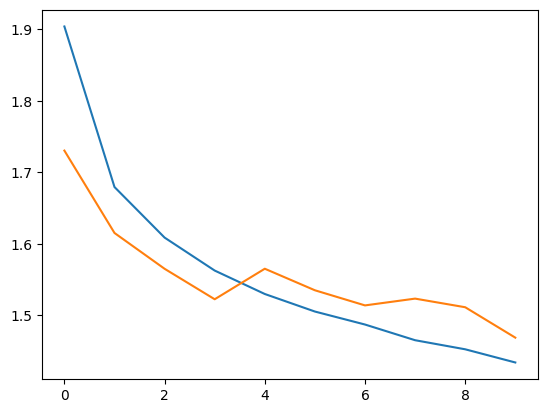

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## CNN Model

In [16]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [17]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,666 (1.73 MB)

 Trainable params: 454,666 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3012 - loss: 1.8650 - val_accuracy: 0.5523 - val_loss: 1.2251
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5758 - loss: 1.2019 - val_accuracy: 0.6291 - val_loss: 1.0786
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6647 - loss: 0.9705 - val_accuracy: 0.7088 - val_loss: 0.8560
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7191 - loss: 0.8141 - val_accuracy: 0.6970 - val_loss: 0.8996
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7549 - loss: 0.7113 - val_accuracy: 0.7102 - val_loss: 0.8500
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7874 - loss: 0.6190 - val_accuracy: 0.7383 - val_loss: 0.8009
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8066 - loss: 0.5582 - val_accuracy: 0.7421 - val_loss: 0.7885
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8361 - loss: 0.478

In [20]:
def plotLosses(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

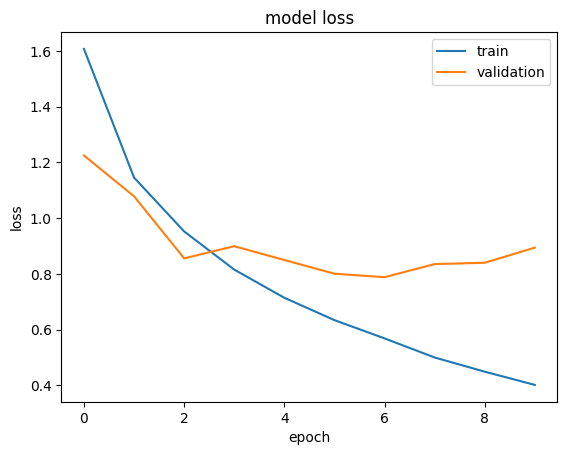

In [21]:
plotLosses(history)

In [22]:
def plotAccuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

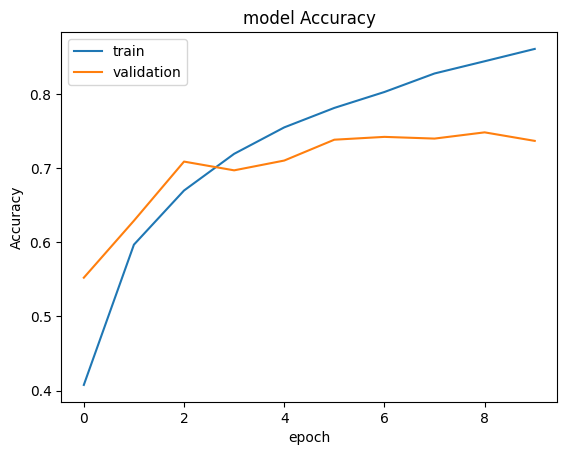

In [23]:
plotAccuracy(history)

In [24]:
from keras.models import load_model
cnn.save('model111.h5')

In [25]:
# Load the model
model = tf.keras.models.load_model('model111.h5')

In [26]:
import numpy as np
# Add a batch dimension to the input
x_test_sample = np.expand_dims(x_test[20], axis=0)

# Now pass it to the model for prediction
model.predict(x_test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

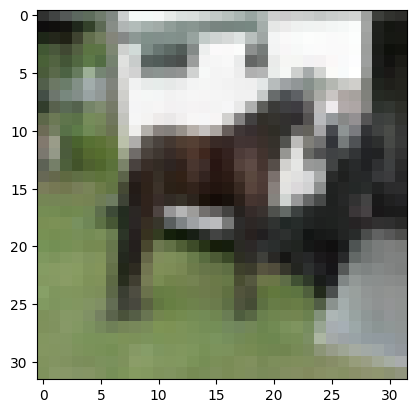

In [27]:
plt.imshow(x_test[20])

In [28]:
# Example: if you have class names like this
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  # replace with your actual class names

# Get the prediction probabilities
predictions = model.predict(x_test_sample)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions)

# Get the corresponding class name
predicted_class_name = class_names[predicted_class_index]

print(f"The predicted class is: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The predicted class is: truck
